## Introduction:
The project focuses on analyzing a California housing dataset. 

The dataset contains various features such as 

longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value - Numerical Variables

ocean_proximity - categorical variable. 

The goal is to perform exploratory data analysis and answer specific questions using appropriate visualizations.

In [1]:
import pandas as pd  #Importing pandas library
import numpy as np  #Importing numpy library
import matplotlib.pyplot as plt #Importing matplotlib library
import seaborn as sns #Importing seaborn library

In [29]:
# Loading dataset
df = pd.read_excel("E:\OdinSchool\odin_python\projects\housing.xlsx")

# Examining data of first 5 rows
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [33]:
# Examining the shape of dataset
df.shape

(20640, 10)

In [31]:
# Examining statistics of all columns
df.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [35]:
# Examining duplicated rows in the dataset
df.duplicated().sum()

0

In [83]:
# Examinings count of null values and percentage of null values in each column
null_info = pd.DataFrame({
                            'null_count': df.isnull().sum(),
                            'null_percent' : round(df.isnull().mean() * 100,3)
                            })
null_info

,null_count,null_percent
longitude,0,0.000
latitude,0,0.000
housing_median_age,0,0.000
total_rooms,0,0.000
total_bedrooms,207,1.003
population,0,0.000
households,0,0.000
median_income,0,0.000
median_house_value,0,0.000
ocean_proximity,0,0.000


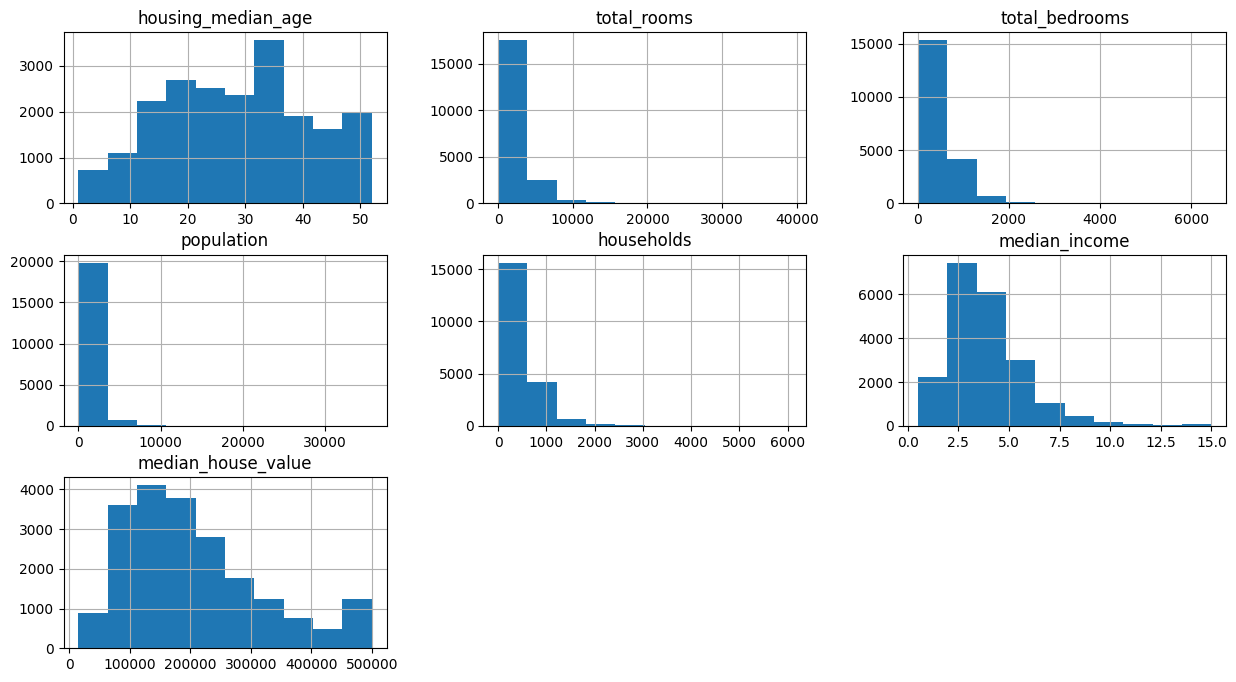

In [67]:
# Examining data distributio in columns
list1 = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']
df1 = df[list1]
df1.hist(figsize = (15,8))
plt.show()

In [84]:
# Examining categories in categorical variable
print(df.ocean_proximity.unique())
print('-'*50)
print(df.ocean_proximity.value_counts())
print('-'*50)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
--------------------------------------------------
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64
--------------------------------------------------


### 1. What is the average median income of the data set and check the distribution of data using appropriate plots. Please explain the distribution of the plot.

Average Median_Income: median_income    3.870671
dtype: float64
median 3.5347999999999997


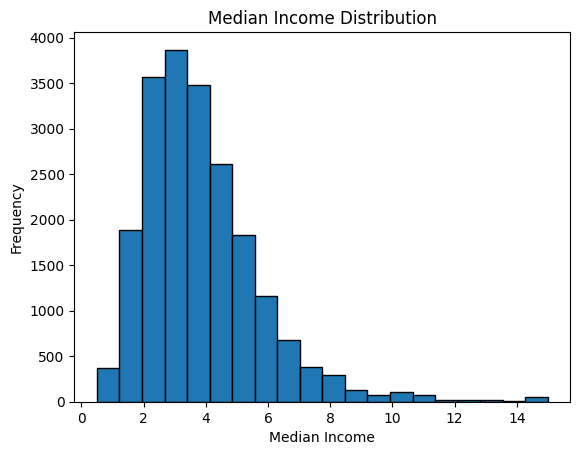

We can observe the above plot and statistics.
mean > median(50% quartile) - which means the data is Positively Skewed


In [30]:
avg_median_income = df[['median_income']].mean() # mean() will give the desired mean value of the column.
print('Average Median_Income:',avg_median_income)
print('median',df['median_income'].median())

# Plotting the average_median_income distribution
plt.hist(df['median_income'], bins = 20, edgecolor = 'black')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.title('Median Income Distribution')
plt.show()


print('''We can observe the above plot and statistics.
mean > median(50% quartile) - which means the data is Positively Skewed''')

In [15]:
#sns.displot(data = df, x = 'median_income', edgecolor = 'Orange', kde = True)

### 2. Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64
We can observe the below plot and statistics.
mean < median(50% quartile) - which means the data is Negatively Skewed


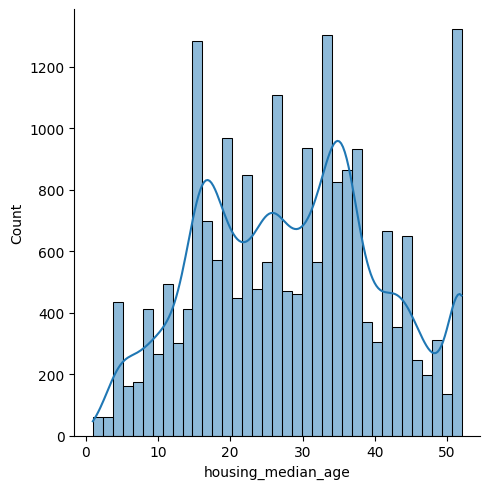

In [16]:
# Plotting housing median age
sns.displot(data = df, x = 'housing_median_age', kde = True)

print(df['housing_median_age'].describe())


print('''We can observe the below plot and statistics.
mean < median(50% quartile) - which means the data is Negatively Skewed''')

### 3. Show with the help of visualization, how median_income and median_house_values are related?

Correlation: 0.6880752079585484


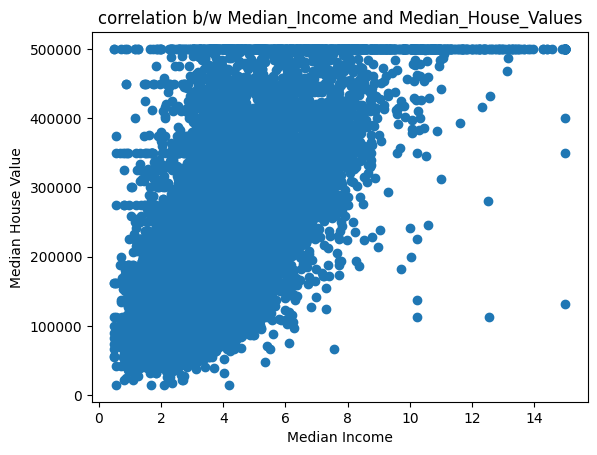

 correlation of 0.688 suggests a moderately positive relationship between median_income and median_house_value


In [17]:
# Plotting the scatter plot to get the relationship between median_income and median_house_values
plt.scatter(df['median_income'],df['median_house_value'])
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('correlation b/w Median_Income and Median_House_Values')

# finding correlation value
corr = df['median_income'].corr(df['median_house_value'])
print('Correlation:',corr)
plt.show()

print(' correlation of 0.688 suggests a moderately positive relationship between median_income and median_house_value')


#print(sns.boxplot(data = df, x = 'median_income'))
#print(sns.boxplot(data = df, x = 'housing_median_age'))

### 4. Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.

In [18]:
# Create a copy of the original dataframe
c_df = df.copy()

# Remove the rows where total_bedrooms are not available
cleaned = c_df.dropna(subset = ['total_bedrooms'])
print('copied df:',cleaned.shape)
print('original df: ',df.shape)

copied df: (20433, 10)
original df:  (20640, 10)


### 5. Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.

In [19]:
# Fill missing values in total_bedrooms with the mean value by mean()
added_df = df.fillna(df['total_bedrooms'].mean())
print('total missing values df: ',df['total_bedrooms'].isnull().sum())
print('total missing values added_df: ',added_df['total_bedrooms'].isnull().sum())

total missing values df:  207
total missing values added_df:  0


### 6. Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.

In [20]:
# Program for median imputation
def calculate_median(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    if n % 2 == 0:
        median = (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
    else:
        median = sorted_data[n//2]
    return median


In [21]:
# Calculate the median of median_income column
calculate_median(df['median_income'])

3.5347999999999997

### 7. Plot latitude versus longitude and explain your observations.

<Axes: xlabel='latitude', ylabel='longitude'>

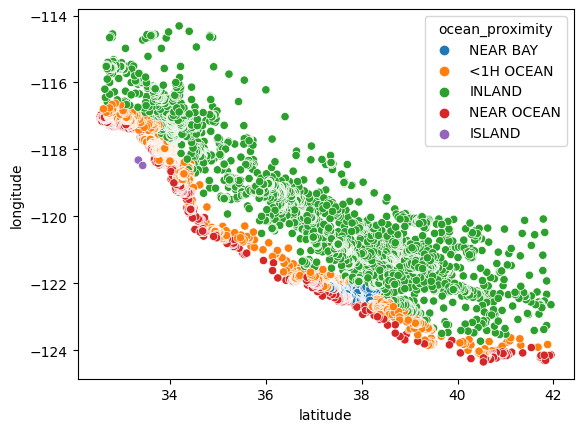

In [22]:
# Plotting latitude vs longitude 
sns.scatterplot(data = df, x = 'latitude', y = 'longitude', hue = 'ocean_proximity')

You can observe different geographical locations for different categories in the above graph

In [24]:
df_nb = df[df.ocean_proximity == 'NEAR BAY'] # creating dataframe for NEAR BAY category.
df_1h = df[df.ocean_proximity == '<1H OCEAN'] # creating dataframe for <1H OCEAN category.
df_in = df[df.ocean_proximity == 'INLAND'] # creating dataframe for INLAND category.
df_NO = df[df.ocean_proximity == 'NEAR OCEAN'] # creating dataframe for NEAR OCEAN category.
df_IS = df[df.ocean_proximity == 'ISLAND'] # creating dataframe for ISLAND category.


Examining Minimum , Maximum and Mean house prices in different locations.

In [85]:
print('Near Bay : min:',df_nb['median_house_value'].min(),'max:',df_nb['median_house_value'].max(),'mean:',df_nb['median_house_value'].mean())
print('-'*10)
print('<1H OCEAN : min:',df_1h['median_house_value'].min(),'max:',df_1h['median_house_value'].max(),'mean:',df_1h['median_house_value'].mean())
print('-'*10)
print('INLAND : min:',df_in['median_house_value'].min(),'max:',df_in['median_house_value'].max(),'mean:',df_in['median_house_value'].mean())
print('-'*10)
print('Near OCEAN : min:',df_NO['median_house_value'].min(),'max:',df_NO['median_house_value'].max(),'mean:',df_NO['median_house_value'].mean())
print('-'*10)
print('ISLAND : min:',df_IS['median_house_value'].min(),'max:',df_IS['median_house_value'].max(),'mean:',df_IS['median_house_value'].mean())


Near Bay : min: 22500 max: 500001 mean: 259212.31179039303
----------
<1H OCEAN : min: 17500 max: 500001 mean: 240084.28546409807
----------
INLAND : min: 14999 max: 500001 mean: 124805.39200122119
----------
Near OCEAN : min: 22500 max: 500001 mean: 249433.97742663656
----------
ISLAND : min: 287500 max: 450000 mean: 380440.0


### 8. Create a data set for which the ocean_proximity is ‘Near ocean’.

In [26]:
# creating a new dataset (new_df) of ocean_proximity is Near Ocean
new_df = df[df.ocean_proximity == 'NEAR OCEAN']
new_df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16,1316,194.0,450,173,10.1597,500001,NEAR OCEAN
20381,-118.83,34.14,16,1956,312.0,671,319,6.4001,321800,NEAR OCEAN
20423,-119.00,34.08,17,1822,438.0,578,291,5.4346,428600,NEAR OCEAN
20424,-118.75,34.18,4,16704,2704.0,6187,2207,6.6122,357600,NEAR OCEAN


### 9. Find the mean and median of the median income for the data set created in question 8.

In [27]:
# creating mean for median_income in new_df dataset
mean_new_df = new_df['median_income'].mean()
print('Mean of Median Income: ',mean_new_df)

# creating median for median_income in new_df dataset
median_new_df = new_df['median_income'].median()
print('Median of Median Income: ',median_new_df)


Mean of Median Income:  4.0057848006019565
Median of Median Income:  3.64705


### 10. Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.

In [28]:
# creating new dataframe and creating new column to seggregate by bedroom size.
updated_df = df['total_bedroom_size'] = np.where(df['total_bedrooms'] <= 10 , 'small', 
                                                 np.where((df['total_bedrooms']>10) & (df['total_bedrooms']<=1000) , 'medium', 
                                                          np.where(df['total_bedrooms'] > 1000 , 'large', None)))
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroom_size
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,medium
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,large
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,medium
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,medium
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,medium
